## Importing neccessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings("ignore")

## Loading Train and Test Data

In [4]:
dftrain= pd.read_csv("train_s3TEQDk.csv")

In [5]:
dftest= pd.read_csv("test_mSzZ8RL.csv")

### a) Exploring Train Data

In [6]:
dftrain.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [7]:
print("Shape of Data: ",dftrain.shape)
print()
print(dftrain.info())
print()
print(dftrain.describe())
print()
print("Null Values are:")
print(dftrain.isnull().sum())


Shape of Data:  (245725, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB
None

                 Age        Vintage  Avg_Account_Balance        Is_Lead
count  245725.000000  245725.000000         2.457250e+05  245725.000000
mean    

### b) Exploring Test data

In [8]:
print("Shape of Data: ",dftest.shape)
print()
print(dftest.info())
print()
print(dftest.describe())
print()
print("Null Values are:")
print(dftest.isnull().sum())


Shape of Data:  (105312, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB
None

                 Age        Vintage  Avg_Account_Balance
count  105312.000000  105312.000000         1.053120e+05
mean       43.871002      46.842819         1.134195e+06
std        14.872890      32.273

In [9]:
dftest.shape


(105312, 10)

#### Few initial things to be noted from above:
1. Credit_Product balance has good amount of null values.
2. We have a lot of features with datatype as Object. So, we need to handle them going ahead.
3. The range of values in each feature varies drastically.
4. "Avg_Account_Balance" feature has values which are lakhs and crores.

### Lets merge train and test data for preprocesing and eda

In [10]:
dftrain['trainFlag']=1
dftest['testFlag']=0
dftest['Is_Lead']= None

In [11]:
df=pd.concat((dftrain,dftest))
df.shape

(351037, 13)

In [12]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,trainFlag,testFlag
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,1.0,NaN
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,1.0,NaN
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,1.0,NaN
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,1.0,NaN
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,1.0,NaN


### Null Hypothesis before starting EDA:

#### 
1. Does Age play a role with people buying Credit Cards?
2. Is it possible that certain Gender is more interested in buying Credit Cards?
3. How does credit card buying varies with occupation?
4. Is Vintage(Trust) playing an important role in sale of a credit card?
5. Are people who already have credit products of some other accounts are interested in buying another credit product?




### Note: Data of Expenditure(Debit)(Yearly/monthly/quaterly) of an indivisual could have helped to find leads better.<br>As people with a habbit of spending more could have been an easy lead.<br>

# EDA

#### In EDA we will analyze the following things
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables and relationship with "Is_Lead"
4. Categorical Variables
5. Distribution of Categorical Variables and relationship with "Is_Lead"


### 1. Missing Values

In [13]:
df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
trainFlag              105312
testFlag               245725
dtype: int64

In [14]:
print("Credit_Product has {} % of null values".format(np.round(df["Credit_Product"].isnull().mean(),2)))

Credit_Product has 0.12 % of null values


##### Relationship of missing values with Target Variable

In [15]:
dfcopy= df.copy()
dfcopy["Credit_Product"]=np.where(df["Credit_Product"].isnull(),1,0)

In [16]:
total_missing_val=dfcopy["Credit_Product"].value_counts()[1]
(dfcopy[dfcopy["Credit_Product"]==1]["Is_Lead"].count()/total_missing_val)*100

70.0767080077425

70% of missing values in Credit_Product corresponds to a "Yes" in Is_Lead.<br>
This means *missing values are important*, as its more important to find a lead, and thus cannot be dropped.

### 2. Numerical Variables in our dataset

In [17]:
num_feature= [feature for feature in df.columns[:-2] if df[feature].dtypes!="O"]
num_feature

['Age', 'Vintage', 'Avg_Account_Balance']

##### a) Discrete Features

In [18]:
disc_feature=[feature for feature in num_feature if len(df[feature].unique())<20]
disc_feature

[]

##### b) Continuous Features

In [19]:
cont_feature=[feature for feature in num_feature if feature not in disc_feature]
cont_feature

['Age', 'Vintage', 'Avg_Account_Balance']

So there are no discrete numerical features.<br>
We have only continuous numerical features.
Lets explore them!

### 3. Distribution of the Numerical Variables and relationship with "Is_Lead"

##### Univariate Analysis of Continuos Features

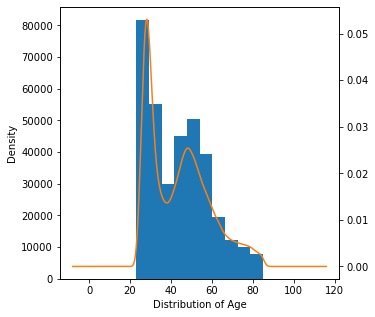

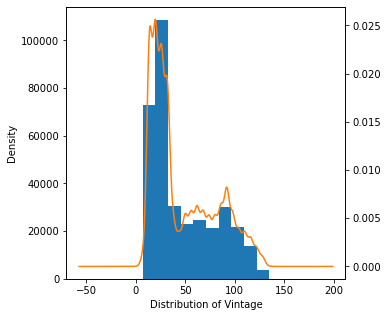

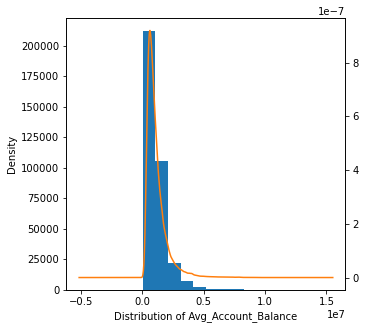

In [20]:
for feature in cont_feature:
        fig,ax=plt.subplots(figsize=(5,5))
        df[feature].plot(kind='hist', ax=ax)
        df[feature].plot(kind='kde', ax=ax, secondary_y =True)
        ax.set_xlabel("Distribution of {}".format(feature))
        plt.show()

Numerical features seems to be right skewed.<br>
It shows existence of outliers.


##### Bivariate Analysis of Continuos Features with target variable

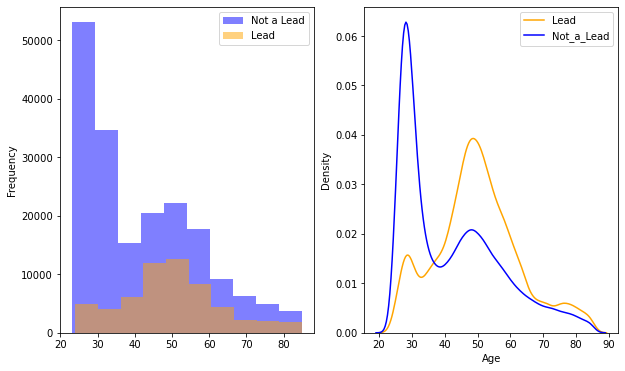

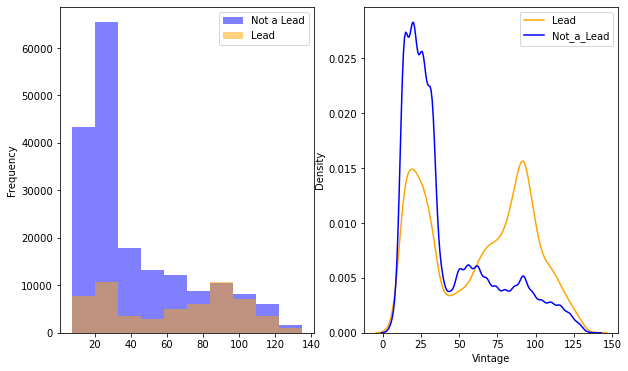

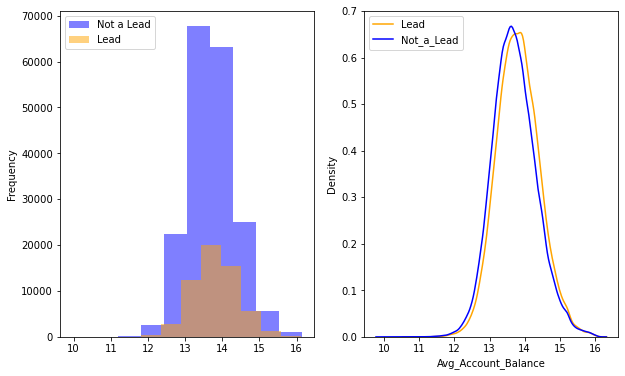

In [21]:
dfcopy=df.copy()
dfcopy["Avg_Account_Balance"]=np.log(dfcopy["Avg_Account_Balance"])
for feature in cont_feature:
    fig=plt.figure(figsize=(10,6))
    ax=fig.add_subplot(121)
    dfcopy[dfcopy["Is_Lead"]==0][feature].plot(kind='hist', color='b', ax=ax, alpha=0.5, label="Not a Lead")
    dfcopy[dfcopy["Is_Lead"]==1][feature].plot(kind='hist', color='orange', ax=ax, alpha=0.5, label="Lead")

    ax1=fig.add_subplot(122)
    sns.kdeplot(dfcopy[dfcopy["Is_Lead"]==1][feature], color='orange', ax=ax1, alpha=0.5, label="Lead")
    sns.kdeplot(dfcopy[dfcopy["Is_Lead"]==0][feature], color='b', ax=ax1, alpha=0.5, label="Not_a_Lead")  

    ax1.legend()
    ax.legend()


### 4.Categorical Variables 

In [22]:
cat_feature=[feature for feature in df.columns if df[feature].dtypes=="O"]
cat_feature


['ID',
 'Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active',
 'Is_Lead']

### 5. Distribution of Categorical Variables and relationship with "Is_Lead"

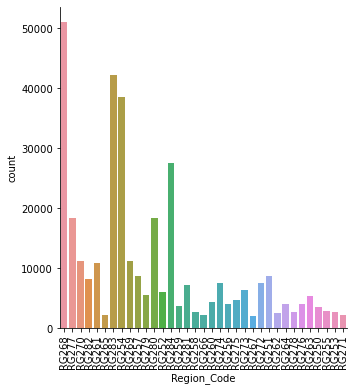

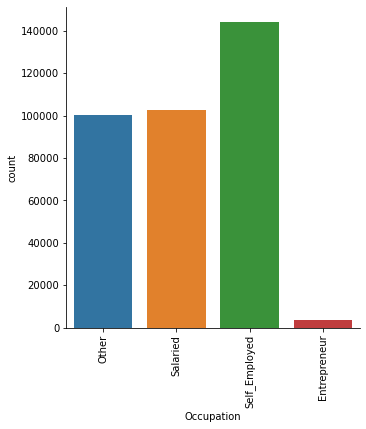

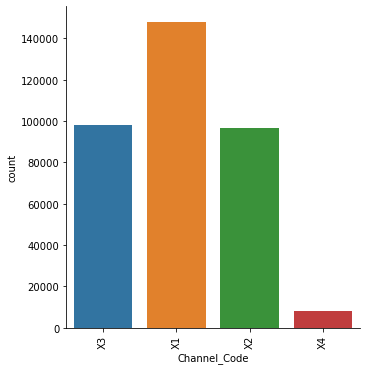

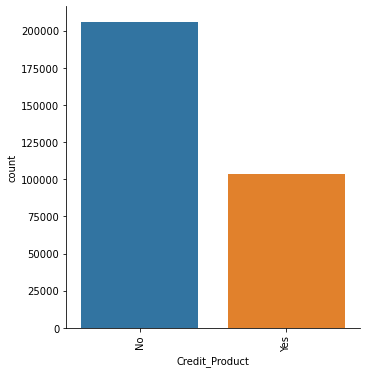

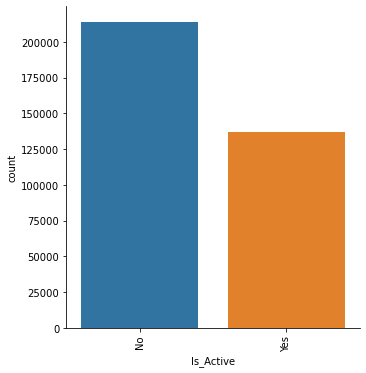

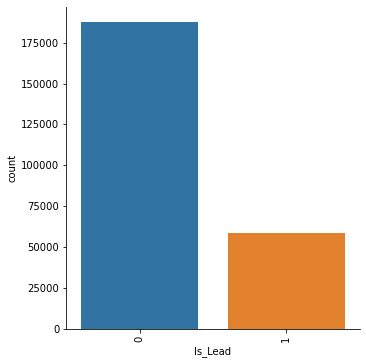

In [23]:
for feature in cat_feature[2:]:
    sns.catplot(feature,data=df, kind="count",ax=ax)
    plt.xticks(rotation=90)


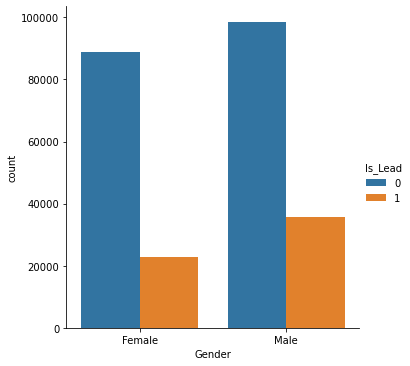

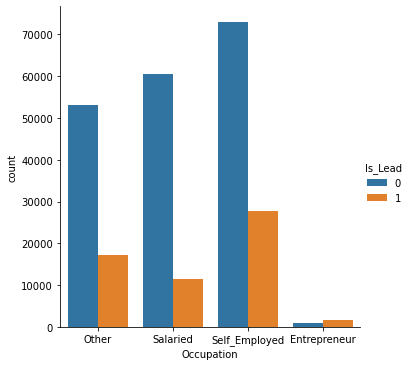

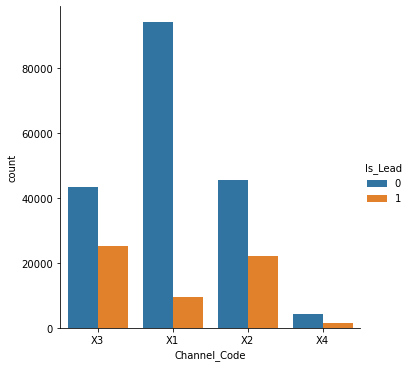

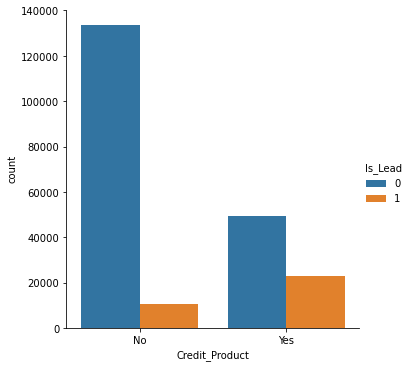

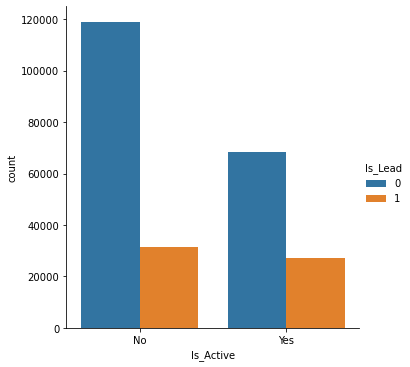

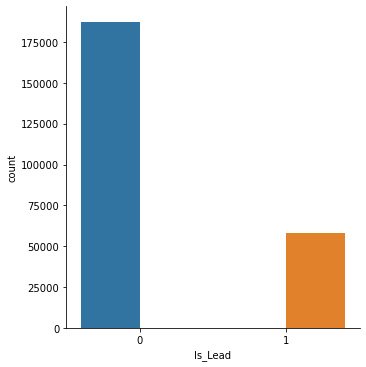

In [24]:
for feature in ['Gender','Occupation','Channel_Code','Credit_Product','Is_Active','Is_Lead']:
    sns.catplot(feature,data=df, kind="count", hue="Is_Lead")

### Outcomes of EDA and answers to Null Hypothesis


1.People age 40-60 are more interested in buying credit cards.<br>

2.There is slight relationship with people Male Gender buying Credit cards.<br>

3.Self employed people(assuming it to be business) are more inclined towars credit cards.<br>
However, Salaried people seems to be less interested.

4.More the Vintage customer is, more is the Trust and greater is the interest to buy credit card.

5.People who already have some other Credit Product are more interested in buying crredit card, rather than the one who does not.




## Feature Engineering 

### 1) Handling missing values

As we saw above, we need can remove missing values from Credit_Product as they are intergral part of our data.
So we will be replacing them.

So, replacing null values with mode

In [25]:
print("When the output is Not a lead, then value counts of Credit_Product:\n", df[df["Is_Lead"]==0]["Credit_Product"].value_counts())
print("When the output is lead, then value counts of Credit_Prodcut\n", df[df["Is_Lead"]==1]["Credit_Product"].value_counts())

When the output is Not a lead, then value counts of Credit_Product:
 No     133734
Yes     49353
Name: Credit_Product, dtype: int64
When the output is lead, then value counts of Credit_Prodcut
 Yes    22690
No     10623
Name: Credit_Product, dtype: int64


One thing is clearly visisble here,<br>
When output is a lead, then the probabaility that he does has have any Credit Product is almost 4 times more than probability that he doesnt.<br>

As we saw above, that 70% of missing values coressponds to a Lead in outcome.<br> 
Therefore, It would be better to choose Yes, that is, 1, to fill in missing values in Credit Product.


In [26]:
df["Credit_Product"]=df["Credit_Product"].fillna('Yes')
df["Credit_Product"].isnull().sum()

0

### 2) Handling Categorical Data 

In [27]:
cat_feature

['ID',
 'Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active',
 'Is_Lead']

##### Converting Gender feature into numerical data by using map mapping function

In [28]:
df['Gender']=df['Gender'].map({'Female':0, 'Male':1})

##### Converting Region Code feature into numerical data by encoding only 10 most frequent labels

In [29]:
len(df['Region_Code'].unique())

35

In [30]:
frequent10=[feature for feature in df["Region_Code"].value_counts().sort_values(ascending=False).head(10).index]
frequent10

['RG268',
 'RG283',
 'RG254',
 'RG284',
 'RG277',
 'RG280',
 'RG270',
 'RG269',
 'RG261',
 'RG257']

In [31]:
for feature in frequent10:
    df[feature]= np.where(df["Region_Code"]==feature,1,0)

In [32]:
df.drop("Region_Code", axis=1, inplace=True)

##### Converting Occupation feature into numerical data by using map function

In [33]:
df['Occupation']=df['Occupation'].map({'Other':1, 'Salaried':2, 'Self_Employed':3, 'Entrepreneur':4 })

##### Converting Channel Code feature into numerical data by using get_dummies

In [34]:
cc=pd.get_dummies(df['Channel_Code'], drop_first=True)
df=pd.concat([df,cc], axis=1)
df.drop("Channel_Code", axis=1, inplace=True)


#####  Converting Credit_Product feature into numerical data by using map function 

In [35]:
df['Credit_Product']=df['Credit_Product'].map({'No':0, 'Yes':1})
df.head()

,ID,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,trainFlag,...,RG284,RG277,RG280,RG270,RG269,RG261,RG257,X2,X3,X4
0,NNVBBKZB,0,73,1,43,0,1045696,No,0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,IDD62UNG,0,30,2,32,0,581988,No,0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,HD3DSEMC,0,56,3,26,0,1484315,Yes,0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,BF3NC7KV,1,34,2,19,0,470454,No,0,1.0,...,0,0,0,1,0,0,0,0,0,0
4,TEASRWXV,0,30,2,33,0,886787,No,0,1.0,...,0,0,0,0,0,0,0,0,0,0


#####  Converting Is_Acvtive feature into numerical data by using map function 

In [36]:
df['Is_Active']=df['Is_Active'].map({'No':0, 'Yes':1})
df.head()

,ID,Gender,Age,Occupation,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,trainFlag,...,RG284,RG277,RG280,RG270,RG269,RG261,RG257,X2,X3,X4
0,NNVBBKZB,0,73,1,43,0,1045696,0,0,1.0,...,0,0,0,0,0,0,0,0,1,0
1,IDD62UNG,0,30,2,32,0,581988,0,0,1.0,...,0,1,0,0,0,0,0,0,0,0
2,HD3DSEMC,0,56,3,26,0,1484315,1,0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,BF3NC7KV,1,34,2,19,0,470454,0,0,1.0,...,0,0,0,1,0,0,0,0,0,0
4,TEASRWXV,0,30,2,33,0,886787,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351037 entries, 0 to 105311
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  int64  
 2   Age                  351037 non-null  int64  
 3   Occupation           351037 non-null  int64  
 4   Vintage              351037 non-null  int64  
 5   Credit_Product       351037 non-null  int64  
 6   Avg_Account_Balance  351037 non-null  int64  
 7   Is_Active            351037 non-null  int64  
 8   Is_Lead              245725 non-null  object 
 9   trainFlag            245725 non-null  float64
 10  testFlag             105312 non-null  float64
 11  RG268                351037 non-null  int32  
 12  RG283                351037 non-null  int32  
 13  RG254                351037 non-null  int32  
 14  RG284                351037 non-null  int32  
 15  RG277            

#### Converting the datatypes into integer ones as the datatype for these columns are shown as unsigned int in the info above

In [38]:
df['X2']=df['X2'].astype(int)
df['X3']=df['X2'].astype(int)
df['X4']=df['X2'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351037 entries, 0 to 105311
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  int64  
 2   Age                  351037 non-null  int64  
 3   Occupation           351037 non-null  int64  
 4   Vintage              351037 non-null  int64  
 5   Credit_Product       351037 non-null  int64  
 6   Avg_Account_Balance  351037 non-null  int64  
 7   Is_Active            351037 non-null  int64  
 8   Is_Lead              245725 non-null  object 
 9   trainFlag            245725 non-null  float64
 10  testFlag             105312 non-null  float64
 11  RG268                351037 non-null  int32  
 12  RG283                351037 non-null  int32  
 13  RG254                351037 non-null  int32  
 14  RG284                351037 non-null  int32  
 15  RG277            

## Splitting Data back to train and test Data

In [40]:
dftrain,dftest=df[df['trainFlag']==1],df[df['testFlag']==0]

In [41]:
dftrain.drop(columns=['trainFlag','testFlag','ID'],inplace=True)
dftest.drop(columns=['trainFlag','testFlag', 'Is_Lead'],inplace=True)


In [42]:
print(dftrain.shape)
print(dftest.shape)

(245725, 21)
(105312, 21)


## Feature Selection

#### Correlation Plot 

<AxesSubplot:>

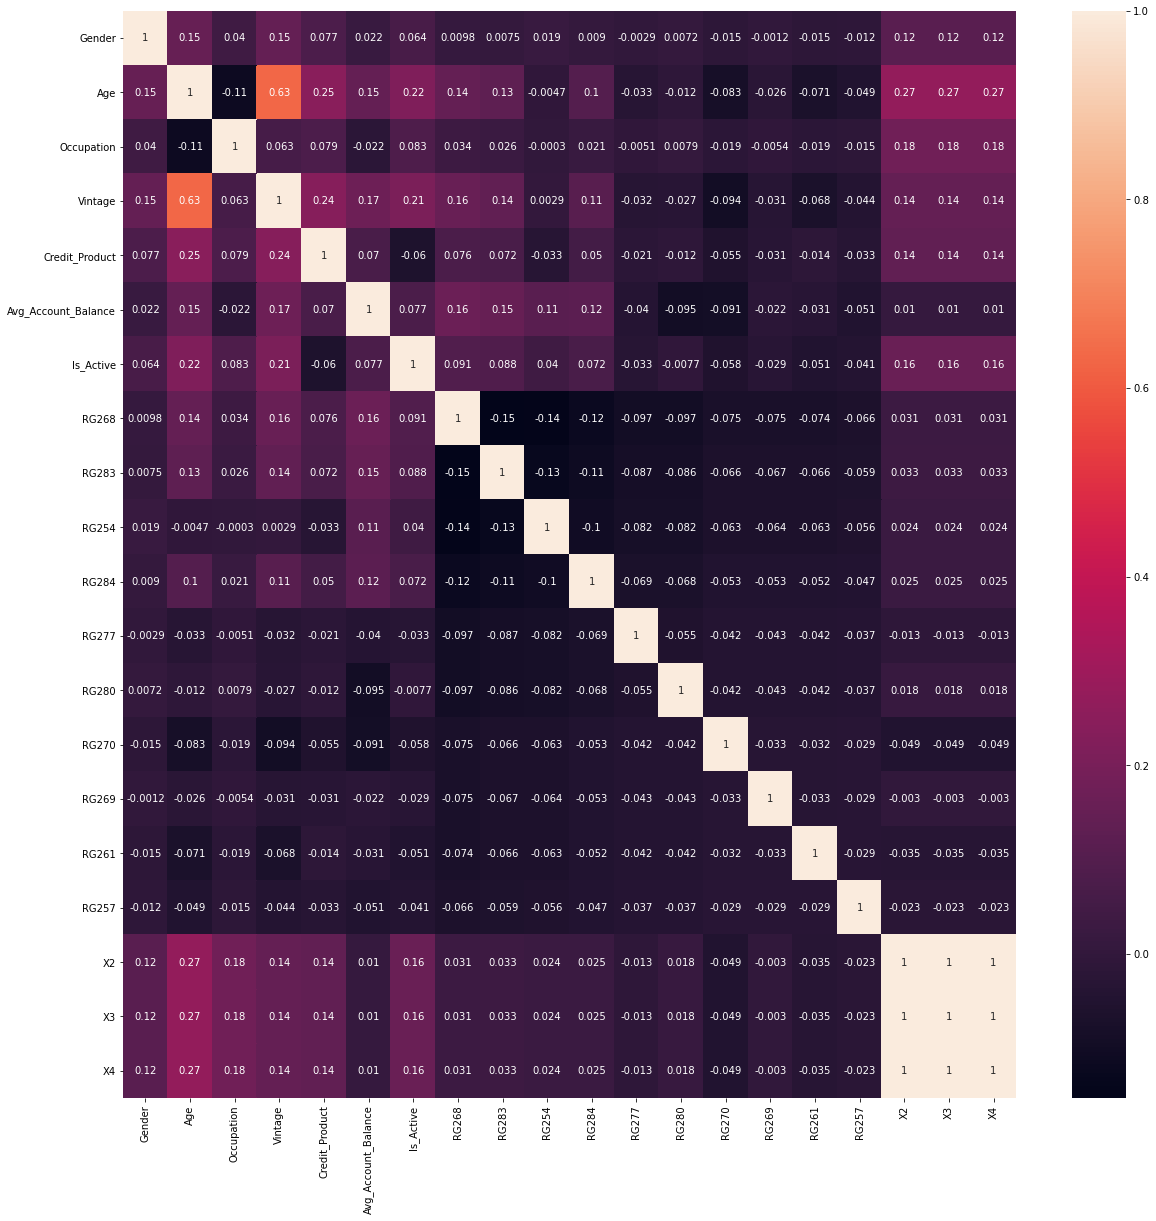

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(dftrain.corr(), annot=True)

#### Dropping X3 and X4 as they are same as X2 and have same effect

In [44]:
dftrain.drop("X3", axis=1, inplace=True)
dftrain.drop("X4", axis=1, inplace=True)
dftest.drop("X3", axis=1, inplace=True)
dftest.drop("X4", axis=1, inplace=True)


Tried dropping Age feature, however no major variation was seen in outcome.

##### Converting target column to int

In [45]:
dftrain["Is_Lead"]=dftrain["Is_Lead"].astype(int)

## Train - Test Split

In [46]:
X=dftrain.drop("Is_Lead", axis=1)
y=dftrain["Is_Lead"]

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=1/3, random_state=42, stratify=y)

## Data Imbalance

#### Lets check if our Train data in balanced on not

0    187437
1     58288
Name: Is_Lead, dtype: int64


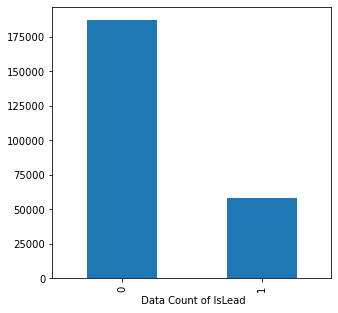

In [48]:
plt.figure(figsize=(5,5))
dftrain["Is_Lead"].value_counts().plot(kind="bar")
plt.xlabel(" Data Count of IsLead")
print(dftrain["Is_Lead"].value_counts())

We can clearly see our data is not balanced. Lets Go ahead and balance it.

### Note:

To handle Data Imbalance, the following techniques were used:<br>
  1. Oversampling
  2. Smote
  3. ADASYN
  4. Undersampling<br>
  
However, Undersampling gave better results as compared to all of them.<br>
So we will be going ahead with Undersampling, that is removing the rows where Is_Lead is 0, <br>
to match it with the number of observation where Is_lead is 1.<br>

In [49]:
from imblearn.under_sampling import RandomUnderSampler
print('original shape:\n', y_train.value_counts())

rus = RandomUnderSampler(random_state=42, replacement=True)
X_train, y_train = rus.fit_resample(X_train, y_train)


print('Undersampled dataset shape\n', y_train.value_counts())

original shape:
 0    124957
1     38859
Name: Is_Lead, dtype: int64
Undersampled dataset shape
 1    38859
0    38859
Name: Is_Lead, dtype: int64


## Feature scaling train and test data for distance based agorithms

In [50]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train_scaled= sc.fit_transform(X_train)
X_test_scaled= sc.transform(X_test)

## Model Evalutaion

In [81]:
def model_eval(y_test,y_pred,auc_var_name):
    #Classification Report
    #print(classification_report(y_test,y_pred))
    #Roc-Auc Score
    print("ROC - AUC Score of {} is:{}".format(auc_var_name,roc_auc_score(y_test,y_pred[:,1])))
    print("")
    #Confusion Matrix
    #print("Confusion Matrix")
    #confusion_matrix(y_test,y_pred[:,1])
    #print(pd.crosstab(y_test, y_pred[:,1], rownames=['True'], colnames=['Predicted'], margins=True))

## Model Deployment

### 1) Logistic Regression

In [78]:
lr= LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict_proba(X_test_scaled)
model_eval(y_test,y_pred,"auc_lr")

ROC - AUC Score of auc_lr is:0.8227557576260629



### 2) Decision Tree

In [82]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_test)

model_eval(y_test,y_pred,"auc_dt")

ROC - AUC Score of auc_dt is:0.6848341463606714



In [83]:
features=list(X_train.columns)

[Text(380.24184952652814, 539.6608695652175, 'Credit_Product <= 0.5\ngini = 0.5\nsamples = 77718\nvalue = [38859, 38859]'),
 Text(221.92156268299365, 531.7826086956522, 'Vintage <= 65.0\ngini = 0.324\nsamples = 34572\nvalue = [27536, 7036]'),
 Text(123.6943598804806, 523.904347826087, 'Age <= 41.5\ngini = 0.255\nsamples = 26448\nvalue = [22481, 3967]'),
 Text(45.31876832677021, 516.0260869565218, 'Occupation <= 1.5\ngini = 0.235\nsamples = 19274\nvalue = [16654, 2620]'),
 Text(17.120354141021988, 508.14782608695657, 'X2 <= 0.5\ngini = 0.141\nsamples = 3866\nvalue = [3570, 296]'),
 Text(11.192610737731664, 500.26956521739135, 'Age <= 32.5\ngini = 0.128\nsamples = 3666\nvalue = [3415, 251]'),
 Text(2.466684820708089, 492.3913043478261, 'Avg_Account_Balance <= 152995.0\ngini = 0.119\nsamples = 2978\nvalue = [2788, 190]'),
 Text(0.7759569062026389, 484.5130434782609, 'Vintage <= 17.0\ngini = 0.355\nsamples = 13\nvalue = [10, 3]'),
 Text(0.7126134852881378, 476.6347826086957, 'Avg_Account_B

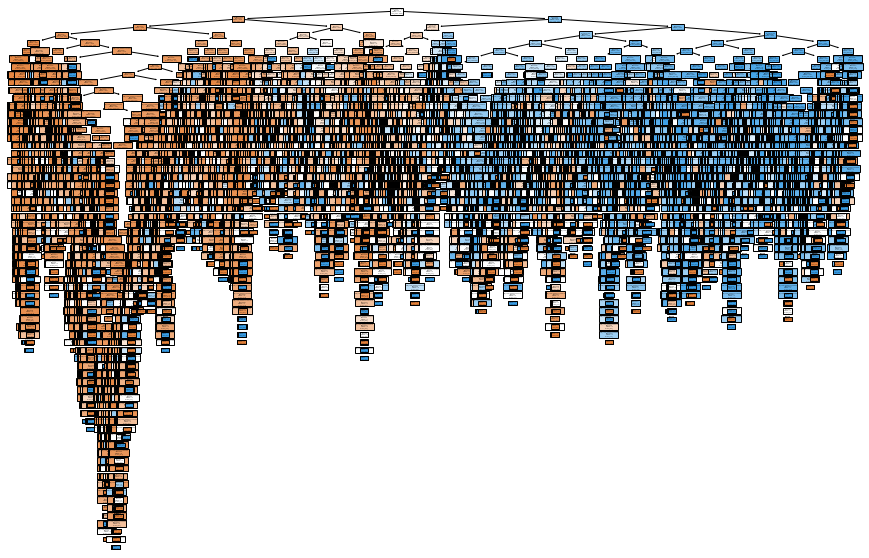

In [84]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,feature_names=features, filled=True)

In [85]:
path= dt.cost_complexity_pruning_path(X_train,y_train)
alpha=path.ccp_alphas
alpha=alpha[:-1]
alpha

array([0.00000000e+00, 5.07997111e-06, 5.87407987e-06, ...,
       4.21941417e-03, 8.29787471e-03, 1.66297058e-02])

In [86]:
classifier=[]
for i in alpha:
    dt=DecisionTreeClassifier(ccp_alpha=i, random_state=42)
    dt.fit(X_train,y_train)
    classifier.append(dt)

In [90]:
trainscore=[clf.score(X_train,y_train) for clf in classifier]
testscore=[clf.score(X_test,y_test) for clf in classifier]



### 3) Random Forest

In [91]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_test)
model_eval(y_test,y_pred,"auc_rf")

ROC - AUC Score of auc_rf is:0.8242102890599602



### 4) XGboost

In [92]:
xgb = XGBClassifier(max_depth=20, n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train)
y_pred=xgb.predict_proba(X_test)
model_eval(y_test,y_pred,"auc_xgb")

[20:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC - AUC Score of auc_xgb is:0.8288863831763033



### 5) Naive Bayes

In [93]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict_proba(X_test)
model_eval(y_test,y_pred,"auc_nb")

ROC - AUC Score of auc_nb is:0.6897591164527016



### Better accuracy could have been achieved using:
1. Performing Cross validation or hyperparamter tuning with different parameters. (Could not do due to system and time limitation).
2. IsolationForest
3. Performing aggregation in Feature Engineering

## Performing Hyperparameter tuning using grid search to increase the accuracy of model

In [95]:
xgb_params= {'n_estimators': 10000, 
             'max_depth': 6, 
             'learning_rate': 0.02, 
             'reg_lambda': 29.32, 
             'subsample': 0.81, 
             'colsample_bytree': 0.23, 
             'colsample_bynode': 0.82, 
             'colsample_bylevel': 0.45}

In [96]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(xgb_params,early_stopping_rounds=100)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

cv = 2

paramGrid = {'learning_rate':[1,0.5,0.1,0.01,0.001],
             'max_depth': [3,5,10,20],
             'n_estimators':[10,50,100]}

fit_params={"early_stopping_rounds":42, 
            "eval_metric" : "auc", 
            "eval_set" : [[X_test, y_test]]}

model = XGBClassifier()

gridsearch = GridSearchCV(model, paramGrid, verbose=1,             
         cv=TimeSeriesSplit(n_splits=cv).get_n_splits([X_train, y_train]))

gridsearch.fit(X_train, y_train, **fit_params)

Fitting 2 folds for each of 60 candidates, totalling 120 fits
[0]	validation_0-auc:0.82325
[1]	validation_0-auc:0.83056
[2]	validation_0-auc:0.83947
[3]	validation_0-auc:0.84072
[4]	validation_0-auc:0.84194
[5]	validation_0-auc:0.84270
[6]	validation_0-auc:0.84355
[7]	validation_0-auc:0.84344
[8]	validation_0-auc:0.84331
[9]	validation_0-auc:0.84307
[0]	validation_0-auc:0.82297
[1]	validation_0-auc:0.82960
[2]	validation_0-auc:0.83911
[3]	validation_0-auc:0.84122
[4]	validation_0-auc:0.84140
[5]	validation_0-auc:0.84249
[6]	validation_0-auc:0.84303
[7]	validation_0-auc:0.84318
[8]	validation_0-auc:0.84324
[9]	validation_0-auc:0.84320
[0]	validation_0-auc:0.82325
[1]	validation_0-auc:0.83056
[2]	validation_0-auc:0.83947
[3]	validation_0-auc:0.84072
[4]	validation_0-auc:0.84194
[5]	validation_0-auc:0.84270
[6]	validation_0-auc:0.84355
[7]	validation_0-auc:0.84344
[8]	validation_0-auc:0.84331
[9]	validation_0-auc:0.84307
[10]	validation_0-auc:0.84286
[11]	validation_0-auc:0.84276
[12]	val

[38]	validation_0-auc:0.83107
[39]	validation_0-auc:0.83080
[40]	validation_0-auc:0.83080
[41]	validation_0-auc:0.83053
[42]	validation_0-auc:0.83045
[43]	validation_0-auc:0.83041
[44]	validation_0-auc:0.82971
[0]	validation_0-auc:0.83301
[1]	validation_0-auc:0.84118
[2]	validation_0-auc:0.84455
[3]	validation_0-auc:0.84426
[4]	validation_0-auc:0.84406
[5]	validation_0-auc:0.84355
[6]	validation_0-auc:0.84296
[7]	validation_0-auc:0.84308
[8]	validation_0-auc:0.84257
[9]	validation_0-auc:0.84202
[10]	validation_0-auc:0.84165
[11]	validation_0-auc:0.84122
[12]	validation_0-auc:0.84068
[13]	validation_0-auc:0.84000
[14]	validation_0-auc:0.83977
[15]	validation_0-auc:0.83965
[16]	validation_0-auc:0.83896
[17]	validation_0-auc:0.83890
[18]	validation_0-auc:0.83877
[19]	validation_0-auc:0.83870
[20]	validation_0-auc:0.83803
[21]	validation_0-auc:0.83783
[22]	validation_0-auc:0.83693
[23]	validation_0-auc:0.83615
[24]	validation_0-auc:0.83614
[25]	validation_0-auc:0.83563
[26]	validation_0-au

[31]	validation_0-auc:0.80124
[32]	validation_0-auc:0.80080
[33]	validation_0-auc:0.80072
[34]	validation_0-auc:0.80012
[35]	validation_0-auc:0.80023
[36]	validation_0-auc:0.79937
[37]	validation_0-auc:0.79909
[38]	validation_0-auc:0.79827
[39]	validation_0-auc:0.79827
[40]	validation_0-auc:0.79785
[41]	validation_0-auc:0.79792
[42]	validation_0-auc:0.79785
[0]	validation_0-auc:0.83520
[1]	validation_0-auc:0.83185
[2]	validation_0-auc:0.82879
[3]	validation_0-auc:0.82649
[4]	validation_0-auc:0.82432
[5]	validation_0-auc:0.82220
[6]	validation_0-auc:0.82116
[7]	validation_0-auc:0.81956
[8]	validation_0-auc:0.81807
[9]	validation_0-auc:0.81692
[10]	validation_0-auc:0.81484
[11]	validation_0-auc:0.81357
[12]	validation_0-auc:0.81306
[13]	validation_0-auc:0.81250
[14]	validation_0-auc:0.81233
[15]	validation_0-auc:0.81107
[16]	validation_0-auc:0.80939
[17]	validation_0-auc:0.80775
[18]	validation_0-auc:0.80670
[19]	validation_0-auc:0.80573
[20]	validation_0-auc:0.80353
[21]	validation_0-au

[12]	validation_0-auc:0.84536
[13]	validation_0-auc:0.84562
[14]	validation_0-auc:0.84545
[15]	validation_0-auc:0.84555
[16]	validation_0-auc:0.84565
[17]	validation_0-auc:0.84557
[18]	validation_0-auc:0.84555
[19]	validation_0-auc:0.84545
[20]	validation_0-auc:0.84546
[21]	validation_0-auc:0.84544
[22]	validation_0-auc:0.84534
[23]	validation_0-auc:0.84526
[24]	validation_0-auc:0.84557
[25]	validation_0-auc:0.84552
[26]	validation_0-auc:0.84543
[27]	validation_0-auc:0.84554
[28]	validation_0-auc:0.84556
[29]	validation_0-auc:0.84552
[30]	validation_0-auc:0.84531
[31]	validation_0-auc:0.84528
[32]	validation_0-auc:0.84520
[33]	validation_0-auc:0.84512
[34]	validation_0-auc:0.84495
[35]	validation_0-auc:0.84488
[36]	validation_0-auc:0.84507
[37]	validation_0-auc:0.84508
[38]	validation_0-auc:0.84503
[39]	validation_0-auc:0.84511
[40]	validation_0-auc:0.84499
[41]	validation_0-auc:0.84499
[42]	validation_0-auc:0.84500
[43]	validation_0-auc:0.84491
[44]	validation_0-auc:0.84488
[45]	valid

[41]	validation_0-auc:0.84184
[42]	validation_0-auc:0.84170
[43]	validation_0-auc:0.84161
[44]	validation_0-auc:0.84159
[45]	validation_0-auc:0.84158
[46]	validation_0-auc:0.84144
[47]	validation_0-auc:0.84131
[48]	validation_0-auc:0.84107
[49]	validation_0-auc:0.84100
[0]	validation_0-auc:0.83301
[1]	validation_0-auc:0.83817
[2]	validation_0-auc:0.84055
[3]	validation_0-auc:0.84178
[4]	validation_0-auc:0.84289
[5]	validation_0-auc:0.84519
[6]	validation_0-auc:0.84539
[7]	validation_0-auc:0.84515
[8]	validation_0-auc:0.84536
[9]	validation_0-auc:0.84532
[10]	validation_0-auc:0.84540
[11]	validation_0-auc:0.84518
[12]	validation_0-auc:0.84504
[13]	validation_0-auc:0.84502
[14]	validation_0-auc:0.84462
[15]	validation_0-auc:0.84435
[16]	validation_0-auc:0.84430
[17]	validation_0-auc:0.84419
[18]	validation_0-auc:0.84409
[19]	validation_0-auc:0.84404
[20]	validation_0-auc:0.84419
[21]	validation_0-auc:0.84401
[22]	validation_0-auc:0.84378
[23]	validation_0-auc:0.84369
[24]	validation_0-au

[3]	validation_0-auc:0.83702
[4]	validation_0-auc:0.83641
[5]	validation_0-auc:0.83623
[6]	validation_0-auc:0.83576
[7]	validation_0-auc:0.83612
[8]	validation_0-auc:0.83598
[9]	validation_0-auc:0.83575
[10]	validation_0-auc:0.83553
[11]	validation_0-auc:0.83458
[12]	validation_0-auc:0.83437
[13]	validation_0-auc:0.83417
[14]	validation_0-auc:0.83334
[15]	validation_0-auc:0.83264
[16]	validation_0-auc:0.83213
[17]	validation_0-auc:0.83174
[18]	validation_0-auc:0.83107
[19]	validation_0-auc:0.83044
[20]	validation_0-auc:0.82985
[21]	validation_0-auc:0.83000
[22]	validation_0-auc:0.82994
[23]	validation_0-auc:0.82959
[24]	validation_0-auc:0.82924
[25]	validation_0-auc:0.82920
[26]	validation_0-auc:0.82914
[27]	validation_0-auc:0.82908
[28]	validation_0-auc:0.82902
[29]	validation_0-auc:0.82882
[30]	validation_0-auc:0.82870
[31]	validation_0-auc:0.82847
[32]	validation_0-auc:0.82826
[33]	validation_0-auc:0.82825
[34]	validation_0-auc:0.82792
[35]	validation_0-auc:0.82749
[36]	validation_0

[32]	validation_0-auc:0.81163
[33]	validation_0-auc:0.81140
[34]	validation_0-auc:0.81134
[35]	validation_0-auc:0.81136
[36]	validation_0-auc:0.81127
[37]	validation_0-auc:0.81110
[38]	validation_0-auc:0.81099
[39]	validation_0-auc:0.81041
[40]	validation_0-auc:0.81027
[41]	validation_0-auc:0.81012
[0]	validation_0-auc:0.82325
[1]	validation_0-auc:0.82350
[2]	validation_0-auc:0.82456
[3]	validation_0-auc:0.82985
[4]	validation_0-auc:0.83126
[5]	validation_0-auc:0.83148
[6]	validation_0-auc:0.83146
[7]	validation_0-auc:0.83206
[8]	validation_0-auc:0.83205
[9]	validation_0-auc:0.83219
[0]	validation_0-auc:0.82297
[1]	validation_0-auc:0.82351
[2]	validation_0-auc:0.82550
[3]	validation_0-auc:0.83071
[4]	validation_0-auc:0.83072
[5]	validation_0-auc:0.83072
[6]	validation_0-auc:0.83071
[7]	validation_0-auc:0.83120
[8]	validation_0-auc:0.83196
[9]	validation_0-auc:0.83255
[0]	validation_0-auc:0.82325
[1]	validation_0-auc:0.82350
[2]	validation_0-auc:0.82456
[3]	validation_0-auc:0.82985
[4]	

In [ ]:
gridsearch.best_params_

## Creating new XGB model with better accuracy

In [ ]:
new_modelxgb4=XGBClassifier(learning_rate= 0.5, max_depth=5, n_estimators= 10)
new_modelxgb4.fit(X_train, y_train)
y_pred_new_xgb4= new_modelxgb.pred_proba(X_test)

In [ ]:
model_eval(y_test,y_pred_new_xgb4,"auc_xgb4")

## Applying Model on Test data to submit predictions

Logistic Regression, SVM and XGBoost almost performed same.<br>
But since, its a competion so selecting XGBoost for high ROC-AUC score.<br>
However, it would be better to go for Logistic Regression due it less time complexity and high Recall.<br>

#### Here False Negative(Lead classified as Not a lead) has more cost than False Postive(Not a Lead classified as a lead), as High FN would make us miss a genuine LEAD. <br>

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
dftest1=dftest.drop("ID", axis=1)
Is_Lead=new_modelxgb4.predict_proba(dftest1)
submit= pd.DataFrame({"ID": dftest.ID, "Is_Lead":Is_Lead})
submit.to_csv("SubmissionXGB.csv")